# Image Classification with PiCam (TFLite)
Developed by Marcelo Rovai - 19Aug20

Reference: [TensorFlow Lite inference](https://www.tensorflow.org/lite/guide/inference)
- Also see: [Python quickstart](https://www.tensorflow.org/lite/guide/python)
- based on [TensorFlow Lite Python classification example with Pi Camera](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification/raspberry_pi)

The term inference refers to the process of executing a TensorFlow Lite model on-device in order to make predictions based on input data. To perform an inference with a TensorFlow Lite model, you must run it through an interpreter. The TensorFlow Lite interpreter is designed to be lean and fast. The interpreter uses a static graph ordering and a custom (less-dynamic) memory allocator to ensure minimal load, initialization, and execution latency.

## Install just the TensorFlow Lite interpreter

To quickly run TensorFlow Lite models with Python, you can install just the TensorFlow Lite interpreter, instead of all TensorFlow packages.

For example, if you have Raspberry Pi that's running Raspbian Buster (which has Python 3.7), install the Python wheel as follows:

`$ sudo pip3 install https://dl.google.com/coral/python/tflite_runtime-2.1.0.post1-cp37-cp37m-linux_armv7l.whl`

## Libraries and setup

In [47]:
import time
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tflite_runtime.interpreter as tflite

## Main Functions

In [48]:
def load_labels(path):
    with open(path, 'r') as f:
        return {i: line.strip() for i, line in enumerate(f.readlines())}

In [49]:
def image_classification(image_path, interpreter, labels, size, top_k_results=3):
    image = cv2.imread(image_path)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(img);
    
    predictions = image_inference(img, size, interpreter)

    # Get indices of the top k results
    top_k_indices = np.argsort(predictions)[::-1][:top_k_results]
    
    print("\n\t[PREDICTION]        [Prob]\n")
    for i in range(top_k_results):
        print("\t{:20}: {}%".format(labels[top_k_indices[i]], int((predictions[top_k_indices[i]] / 255.0)*100)))

In [50]:
def image_inference(img, size, interpreter):
    
    # Preprocess image
    img = cv2.resize(img, size) 

    ### Add a batch dimension
    input_data = np.expand_dims(img, axis=0)

    ### Add a batch dimension
    input_data = np.expand_dims(img, axis=0)

    # Point the data to be used for testing and run the interpreter
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()

    # Obtain results and map them to the classes
    predictions = interpreter.get_tensor(output_details[0]['index'])[0]
    
    return predictions

## Load model, allocate and get tensors

In [51]:
interpreter = tflite.Interpreter(model_path='./models/mobilenet_v1_1.0_224_quant.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

## Load Labels and model parameters

In [52]:
labels = load_labels('./models/labels_mobilenet_quant_v1_224.txt')
input_shape = input_details[0]['shape']
img_size = input_shape[:2] if len(input_shape) == 3 else input_shape[1:3]
size = img_size[0],img_size[1]

### Test inference


	[PREDICTION]        [Prob]

	Egyptian cat        : 61%
	tiger cat           : 22%
	tabby               : 11%


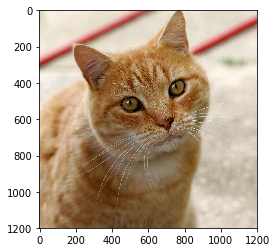

In [53]:
image_path = './images/cat_2.jpg'
image_classification(image_path, interpreter, labels, size)

### Testing with image captured using RPi

In [ ]:
image_path = './myimage.jpg'
image_classification(image_path, interpreter, labels, size)